In [63]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
connect = sql.connect('database.sqlite')
connect

In [3]:
pd.read_sql_query("select * from Salaries",connect)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [4]:
def sql_query(q):
    return pd.read_sql_query(q,connect)

1. What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

In [7]:
q = '''select JobTitle , avg(TotalPayBenefits) 'Average of Total Benefits'  from salaries
       where TotalPayBenefits not in ('Not Provided','Not provided')
       group by 1
    '''

sql_query(q)

,JobTitle,Average of Total Benefits
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
4,ACUPUNCTURIST,67594.400000
...,...,...
2154,X-RAY LABORATORY AIDE,52705.880385
2155,X-Ray Laboratory Aide,69521.123200
2156,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2157,Youth Comm Advisor,60118.550000


2. Which JobTitle has the most employees in each year? exclude ('Not Provided', 'Not provided')

In [11]:
q = '''select year,JobTitle from salaries
        where JobTitle not in ('Not Provided' , 'Not provided')
        group by 1
    ''' 

sql_query(q)

,Year,JobTitle
0,2011,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,2012,"Lieutenant, Fire Suppression"
2,2013,Chief of Police
3,2014,Deputy Chief 3


3. What is the total number of unique employees? exclude ('Not Provided', 'Not provided')

In [13]:
q = '''select count(DISTINCT EmployeeName) 'Total Unique Employee' from salaries
       where EmployeeName not in ('Not Provided' , 'Not provided')
    '''

sql_query(q)

,Total Unique Employee
0,110809


4. Show All Employees Ordered By Their TotalPayBenefits In Descending Order? exclude ('Not Provided', 'Not provided')

In [15]:
q = '''select TotalPayBenefits, EmployeeName  from salaries
       where EmployeeName not in ('Not Provided' , 'Not provided')
       order by 1 desc
    '''

sql_query(q)

,TotalPayBenefits,EmployeeName
0,567595.43,NATHANIEL FORD
1,538909.28,GARY JIMENEZ
2,510732.68,David Shinn
3,479652.21,Amy P Hart
4,436224.36,William J Coaker Jr.
...,...,...
148643,0.00,Roy I Tillery
148644,-2.73,Timothy E Gibson
148645,-8.20,Mark E Laherty
148646,-33.89,David P Kucia


5. Show All Employees With A TotalPaybenefits Value Between 125,000 and 150,000 And A Job Title 'Firefighter'? exclude ('Not Provided', 'Not provided')

In [35]:
q = '''select EmployeeName , TotalPayBenefits, jobtitle from salaries
       where TotalPayBenefits between 125000 and 150000 and jobtitle = 'Firefighter' and EmployeeName not in ('Not Provided' , 'Not provided') 
    '''

sql_query(q)

,EmployeeName,TotalPayBenefits,JobTitle
0,Randall Henderson,147912.75,Firefighter
1,Virginia Cheung,147862.14,Firefighter
2,Travis Hemenez,147664.12,Firefighter
3,Gail Readdie,147452.17,Firefighter
4,Gregory Ginotti,147216.47,Firefighter
...,...,...,...
110,Stephen J Kloster,126784.13,Firefighter
111,Jeffrey D Ryan,126687.13,Firefighter
112,Jovan R Blake,126169.62,Firefighter
113,Dino M Cafferata,125680.52,Firefighter


6. How many employees have no overtime pay or other pay? exclude ('Not Provided', 'Not provided')


In [43]:
q = '''select count(*) as 'Employee Count' , overtimepay ,otherpay from salaries 
        where overtimepay = 0 and otherpay = 0 and EmployeeName not in ('Not Provided' , 'Not provided')
    '''
sql_query(q)

,Employee Count,OvertimePay,OtherPay
0,34655,0,0


7. Show top 10 employees having (overtimepay+OtherPay) in bar plot?  exclude ('Not Provided', 'Not provided')

In [81]:
q = '''select otherpay+overtimepay 'Top',employeename from salaries
       where EmployeeName not in ('Not Provided' , 'Not provided') 
       order by otherpay+overtimepay desc limit 10
      
    '''

sql_query(q)

,Top,EmployeeName
0,400184.25,NATHANIEL FORD
1,382943.26,GARY JIMENEZ
2,342802.63,David Shinn
3,254427.61,CHRISTOPHER CHONG
4,245999.41,John Goldberg
5,234035.79,Gary Altenberg
6,224472.73,Khoa Trinh
7,223489.04,ALSON LEE
8,216637.92,Brendan A Ward
9,213311.84,Whitney P Yee


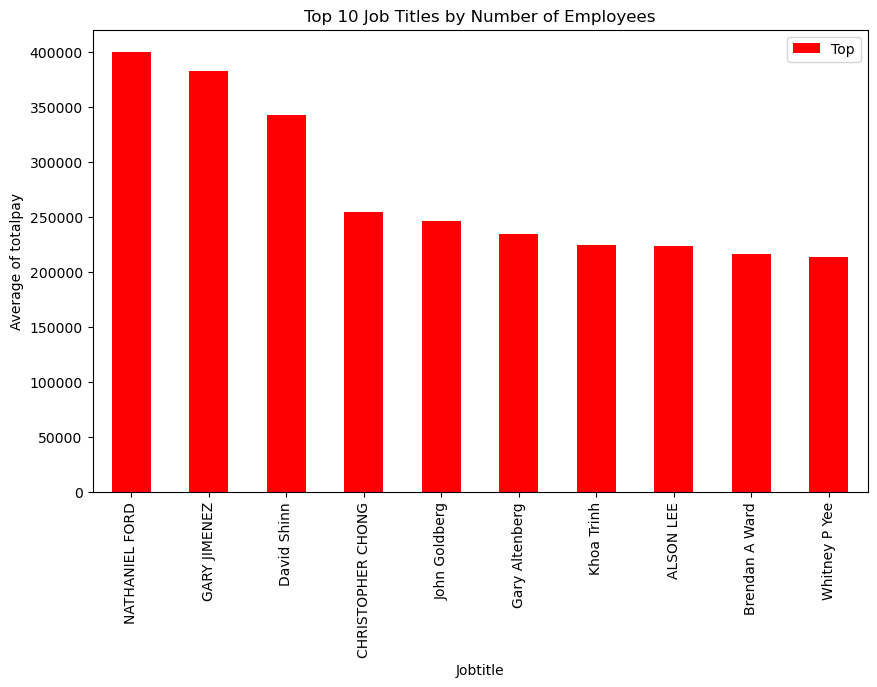

In [79]:
a = pd.read_sql_query(q, connect)
a.plot(kind='bar',x='EmployeeName',y='Top', color='red', figsize=(10, 6))

plt.xlabel('Jobtitle')
plt.ylabel('Average of totalpay')
plt.title('Top 10 Job Titles by Number of Employees')

plt.show()

8. Show The Average of BasePay, OverTime, OtherPay for all employees in pie chart? exclude ('Not Provided', 'Not provided')


In [97]:
q = '''select avg(basepay)'average of Basepay',avg(overtimepay)'average of Overtimepay',avg(otherpay)'average of Otherpay' from salaries
       where EmployeeName not in ('Not Provided' , 'Not provided')
       order by 2
    '''

sql_query(q)

,average of Basepay,average of Overtimepay,average of Otherpay
0,66055.45257,5065.821161,3648.761721


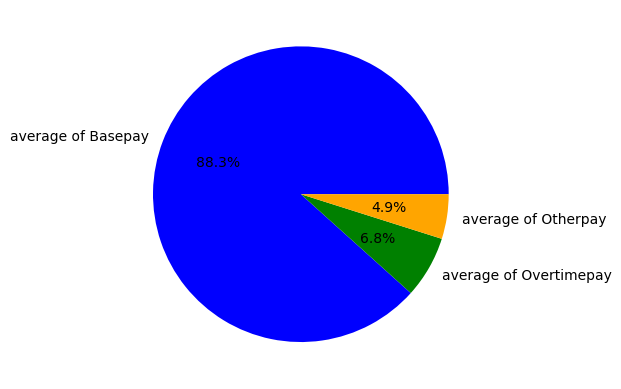

In [124]:
a = pd.read_sql_query(q, connect)

# Transpose the DataFrame to get the required format
a = a.T
a.columns = ['Average Pay']
a.index.name = 'Category'
plt.pie(a['Average Pay'], labels=a.index, autopct='%1.1f%%', colors=['blue', 'green', 'orange'])


plt.show()


9. Get the average TotalPayBenefits for each JobTitle, but only for those with an average pay greater than 75000? exclude ('Not Provided', 'Not provided')


In [150]:
q = '''select jobtitle , avg(TotalPayBenefits)'AveragePay' from salaries
       group by 1
       having avg(TotalPayBenefits) > 75000 and jobtitle not in ('Not Provided' , 'Not provided') 
    '''

sql_query(q)

,JobTitle,AveragePay
0,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
1,ADMINISTRATIVE ANALYST III,92698.515000
2,ADMINISTRATIVE ENGINEER,127961.430000
3,ADMINISTRATIVE SERVICES MANAGER,77015.580000
4,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.440000
...,...,...
1432,Window Cleaner Supervisor,108550.543333
1433,Wire Rope Cable Maint Mechanic,138837.434333
1434,Wire Rope Cable Maint Sprv,242118.323333
1435,Worker's Comp Supervisor 1,96125.531429


10. Get the number of employees (EmployeeName) for each JobTitle, where the count is greater than 10?  exclude ('Not Provided', 'Not provided')


In [160]:
q = '''select jobtitle, count(employeename)'Count' from salaries
       group by 1
       having count(employeename) > 10 and jobtitle not in ('Not Provided' , 'Not provided') 
    '''

sql_query(q)

,JobTitle,Count
0,ACCOUNT CLERK,83
1,ACCOUNTANT INTERN,48
2,ADMINISTRATIVE ANALYST,93
3,AIRPORT COMMUNICATIONS OPERATOR,27
4,AIRPORT ECONOMIC PLANNER,13
...,...,...
1151,Wire Rope Cable Maint Mechanic,30
1152,Worker's Comp Supervisor 1,14
1153,Worker's Compensation Adjuster,74
1154,X-RAY LABORATORY AIDE,26
